In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:
# read the data
features = ['Card 1 Suit','Card 1 Rank', 'Card 2 Suit','Card 2 Rank', 'Card 3 Suit','Card 3 Rank', 'Card 4 Suit','Card 4 Rank', 'Card 5 Suit', 'Card 5 Rank', 'Poker Hand']
train_data = pd.read_csv('poker_hand_train.csv', sep=",", names=features)
test_data = pd.read_csv('poker_hand_test.csv', sep=",", names=features)

In [3]:
# data preparation
# pokerHandMap = {0: "Nothing in hand",\
#                  1: "One pair",\
#                  2: "Two paris",\
#                  3: "Three of a kind",\
#                  4: "Straight",\
#                  5: "Flush",\
#                  6: "Full house",\
#                  7: "Four of a kind",\
#                  8: "Straight Flush",\
#                  9: "Royal Flush",
#                  }

# suitMap = {1: "Hearts", 2: "Spades", 3: "Diamonds", 4:"Clubs"}

data = pd.concat([train_data, test_data])



In [4]:
data.head()

,Card 1 Suit,Card 1 Rank,Card 2 Suit,Card 2 Rank,Card 3 Suit,Card 3 Rank,Card 4 Suit,Card 4 Rank,Card 5 Suit,Card 5 Rank,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


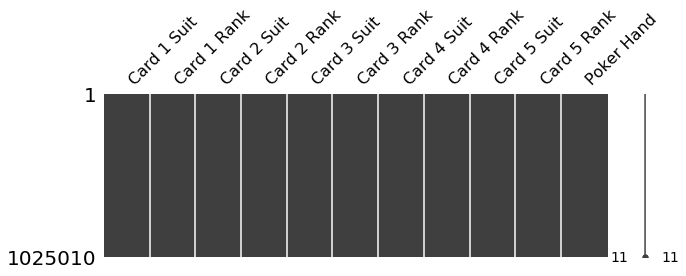

In [5]:
# Missing data detection
msno.matrix(data, figsize=(10,3))

In [6]:
# Pretify the data
# prettyData = pd.concat([train_data, test_data])
# prettyData['Card 1 Suit'] = prettyData['Card 1 Suit'].map(suitMap)
# prettyData['Card 2 Suit'] = prettyData['Card 2 Suit'].map(suitMap)
# prettyData['Card 3 Suit'] = prettyData['Card 3 Suit'].map(suitMap)
# prettyData['Card 4 Suit'] = prettyData['Card 4 Suit'].map(suitMap)
# prettyData['Card 5 Suit'] = prettyData['Card 5 Suit'].map(suitMap)
# prettyData['Poker Hand'] = prettyData['Poker Hand'].map(pokerHandMap)

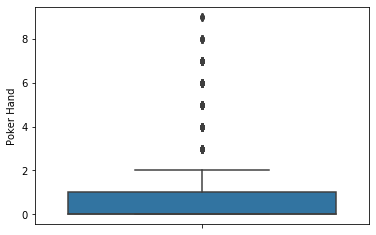

In [7]:
# Data Distribution
sn.boxplot(data=data, y="Poker Hand", orient="v")

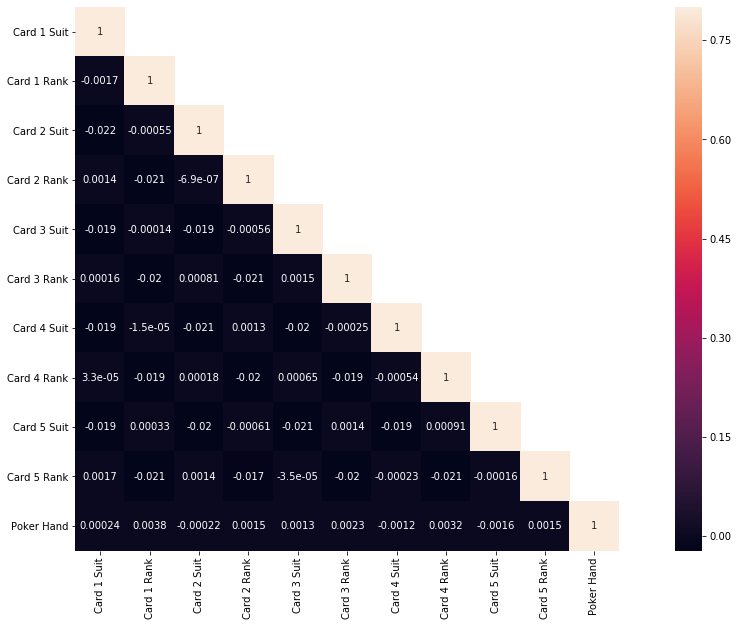

In [8]:
# Correlation analysis
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [10]:
# Loop through clusters and fit the model to the train set
clusters=range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1),data.shape[0]))
    

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

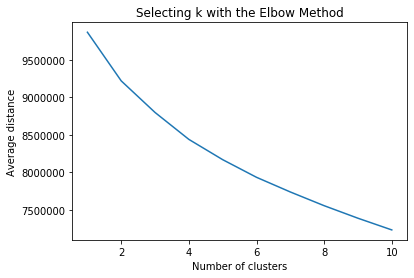

In [11]:
# display the data
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [12]:
# Interpret 2 cluster solution
mode2Cluster = KMeans(n_clusters=2)
mode2Cluster.fit(data)
preds=mode2Cluster.predict(data)

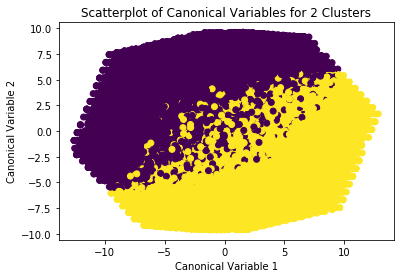

In [13]:
# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode2Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()

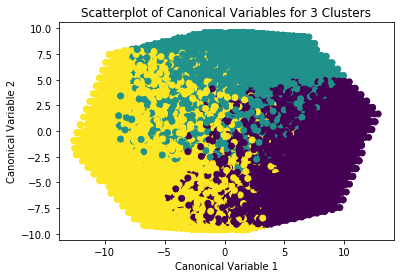

In [15]:
# Interpret 3 cluster solution
mode3Cluster = KMeans(n_clusters=3)
mode3Cluster.fit(data)
preds=mode3Cluster.predict(data)

# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode3Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

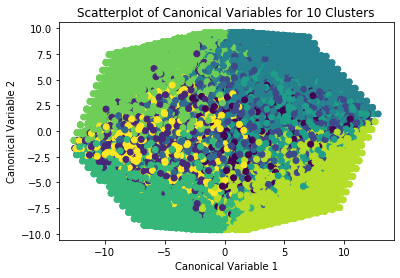

In [16]:
# Interpret 10- cluster solution
mode10Cluster = KMeans(n_clusters=10)
mode10Cluster.fit(data)
preds=mode3Cluster.predict(data)

# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode10Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 10 Clusters')
plt.show()